IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline


C:\Users\MASHALO\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


LOADING DATASET

In [2]:

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
#               'fbs', 'restecg', 'thalach', 'exang', 
#               'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df.shape

(303, 14)

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# DATA PREPROCESSING

Checking for null values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# df['ca'] = df['ca'].fillna(df['ca'].mean())
# df['thal'] = df['ca'].fillna(df['thal'].mean())

Checking for duplicates

In [8]:
df.duplicated().sum()

1

Handling duplicates

In [9]:
df.drop_duplicates(keep = 'first', inplace = True)

Checking for outliers

In [10]:
#show the size of each column 
for col in df.columns:
    print(col," : ", df[col].unique().size)

age  :  41
sex  :  2
cp  :  4
trestbps  :  49
chol  :  152
fbs  :  2
restecg  :  3
thalach  :  91
exang  :  2
oldpeak  :  40
slope  :  3
ca  :  5
thal  :  4
target  :  2


In [11]:
#splitting categorical and continous data
continous_val = []
categorical_val = []
for column in df.columns:
    if len(df[column].unique())<=6:
        categorical_val.append(column)
    else:
        continous_val.append(column)

continous_val


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

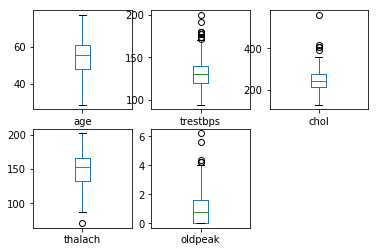

In [12]:
#checking for outliers in continous value
df[continous_val].plot(kind='box', subplots=True, layout= (2,3), sharex=False, sharey= False)
plt.show()

Handling outliers quatile method

In [13]:
for x in df[continous_val]:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q3-q1
 
    max = q3+(1.5*intr_qr)
    min = q1-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    9
chol        5
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
mean_value = df['oldpeak'].mean()
df['oldpeak'].fillna(mean_value, inplace = True)

In [16]:
mean_value = df['chol'].mean()
df['chol'].fillna(mean_value, inplace = True)

In [17]:
mean_value = df['trestbps'].mean()
df['trestbps'].fillna(mean_value, inplace = True)

In [18]:
mean_value = df['thalach'].mean()
df['thalach'].fillna(mean_value, inplace = True)

In [19]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# DATA VISUALIZATION 

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,243.272727,0.149007,0.526490,149.830565,0.327815,0.977778,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.148505,44.621439,0.356686,0.526027,22.449823,0.470196,1.041040,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


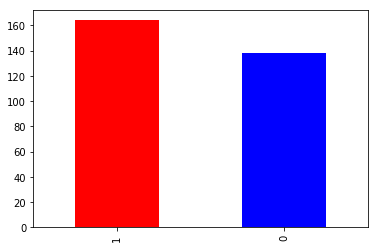

In [21]:
df.target.value_counts().plot(kind="bar", color=["red", "blue"])

In [22]:
haveno_disease = len(df[df.target == 0])
have_disease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((haveno_disease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((have_disease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


In [23]:
haveno_disease = len(df[df.fbs == 0])
have_disease = len(df[df.fbs == 1])
print("Percentage of Patients Haven't fasting blood sugar: {:.2f}%".format((haveno_disease / (len(df.target))*100)))
print("Percentage of Patients Have fasting blood sugar: {:.2f}%".format((have_disease / (len(df.target))*100)))

Percentage of Patients Haven't fasting blood sugar: 85.10%
Percentage of Patients Have fasting blood sugar: 14.90%


In [24]:
female_count = len(df[df.sex == 0])
male_count = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((female_count / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((male_count / (len(df.sex))*100)))

Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


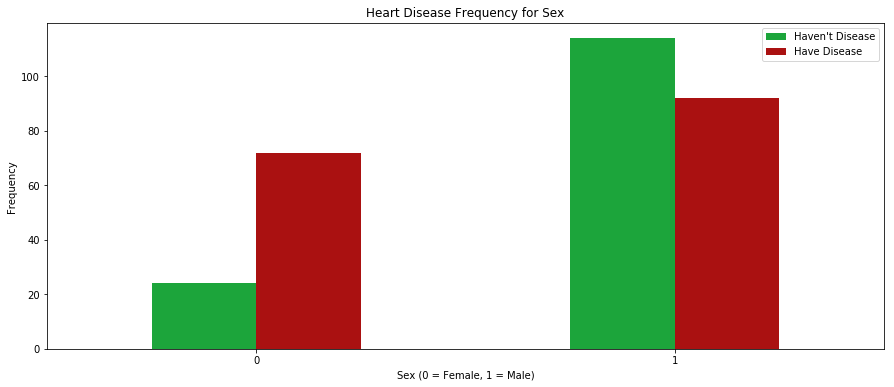

In [25]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

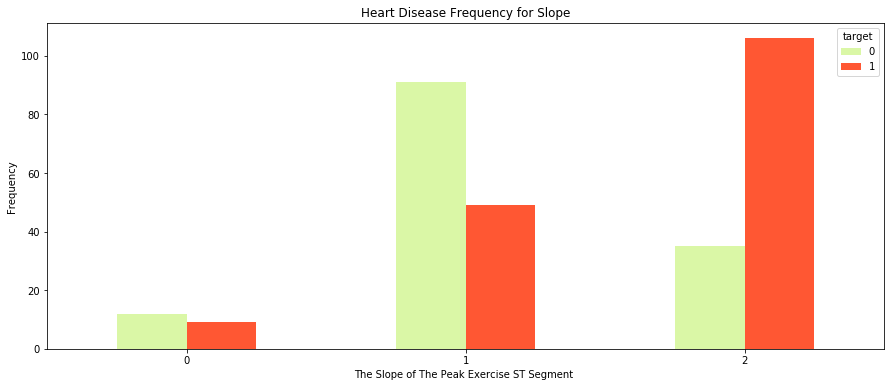

In [26]:
pd.crosstab(df['slope'],df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

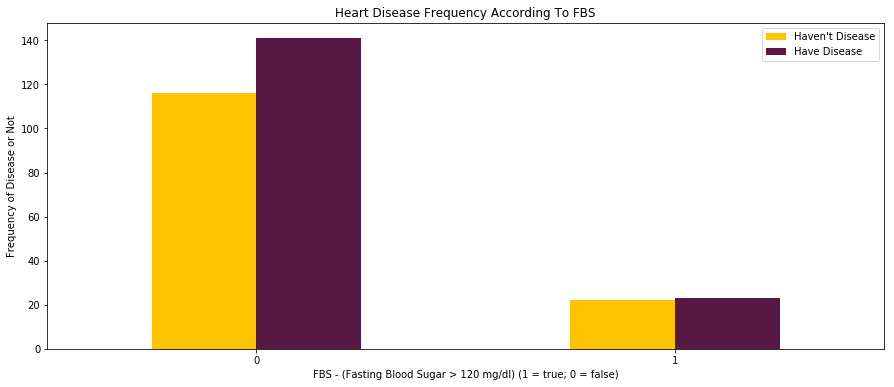

In [27]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [28]:
cp1 = len(df[df.cp == 0])
cp2 = len(df[df.cp == 1])
cp3 = len(df[df.cp == 2])
cp4 = len(df[df.cp == 3])
print("Percentage of Female Patients: {:.2f}%".format((cp1 / (len(df.cp))*100)))
print("Percentage of Female Patients: {:.2f}%".format((cp2 / (len(df.cp))*100)))
print("Percentage of Female Patients: {:.2f}%".format((cp3 / (len(df.cp))*100)))
print("Percentage of Female Patients: {:.2f}%".format((cp4 / (len(df.cp))*100)))

Percentage of Female Patients: 47.35%
Percentage of Female Patients: 16.56%
Percentage of Female Patients: 28.48%
Percentage of Female Patients: 7.62%


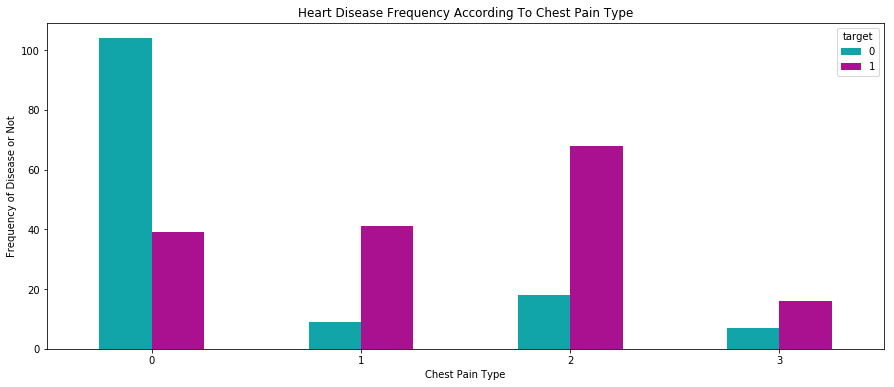

In [29]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


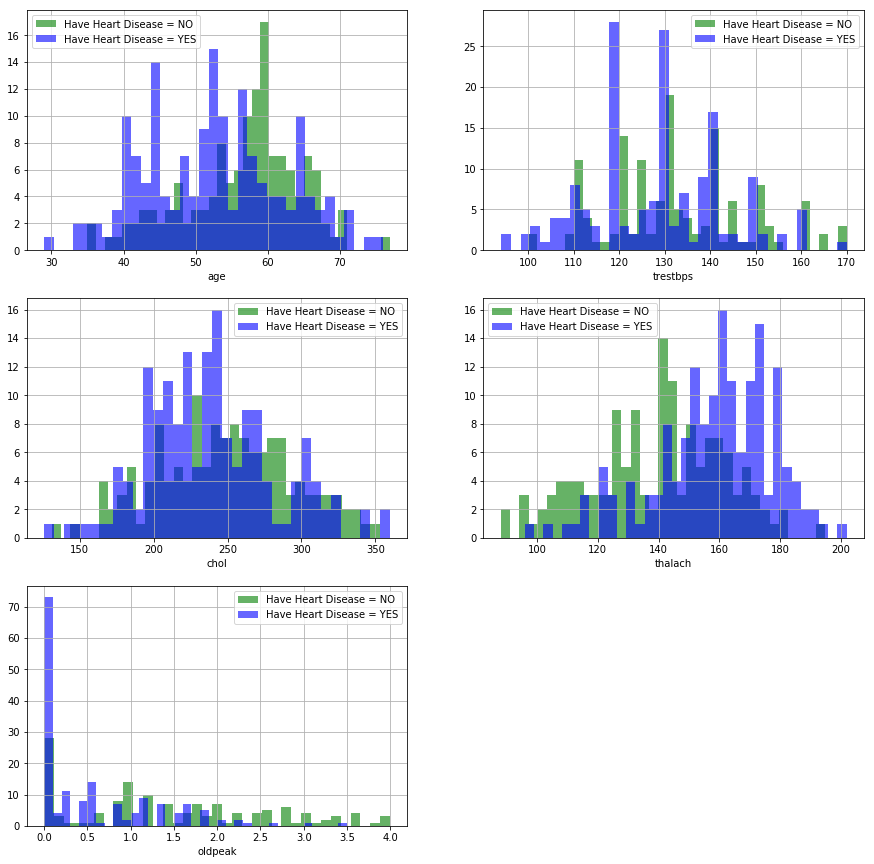

In [31]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='blue', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

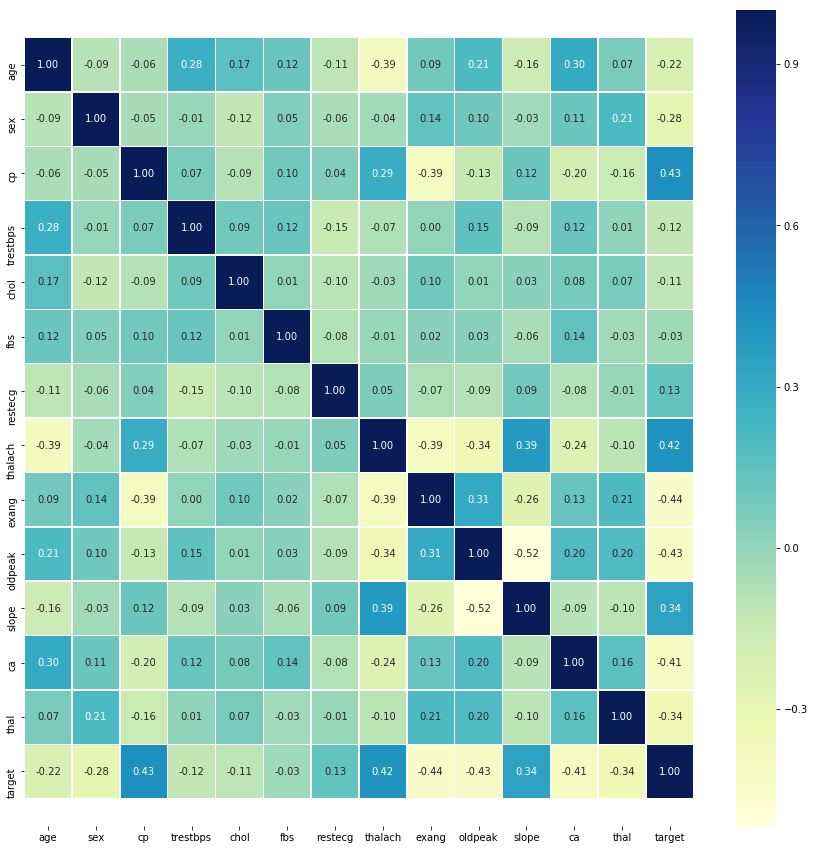

In [32]:
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

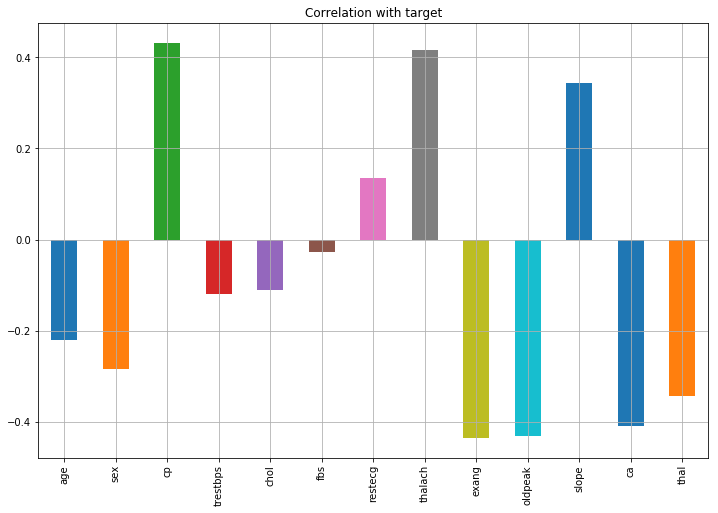

In [33]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                    title="Correlation with target")

In [34]:
df.drop("fbs", axis=1, inplace = True)

In [35]:
df.head(5)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,1,163.0,1,0.6,2,0,2,1


In [36]:
d_clean = df
d_clean.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,1,163.0,1,0.6,2,0,2,1


In [37]:
#dividing the data into dependent and independent variables and training and testing sets
from sklearn.model_selection import train_test_split
y =d_clean['target']
x = d_clean.drop(columns = ['target'])

x_train, x_test, y_train , y_test = train_test_split(x,y,stratify = y, test_size=0.25,random_state =0)


In [41]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN', MLPClassifier(hidden_layer_sizes=(12,12), activation='relu', solver='adam', max_iter=100)))

In [42]:
names = []
scores = []
y_pred_tot =[]
for name, model in models:
    model.fit(x_train, y_train)                    #Fitting train sets 
    y_pred = model.predict(x_test)                 #Predicting the Test result
    y_pred_tot.append(y_pred)
    scores.append(accuracy_score(y_test, y_pred)*100)
    names.append(name)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

,Model,Accuracy
0,KNN,68.421053
1,SVC,55.263158
2,LR,89.473684
3,DT,77.631579
4,GNB,85.526316
5,RF,78.947368
6,GB,84.210526
7,NN,53.947368


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 12)
(76, 12)
(226,)
(76,)


In [44]:
from numpy import array
y_train.value_counts()

1    123
0    103
Name: target, dtype: int64

In [45]:
y_test.value_counts()

1    41
0    35
Name: target, dtype: int64

Accuracy of Random Forest Classifier
0.8289473684210527
CONFUSSION MATRIX
[[27  8]
 [ 5 36]]
             precision    recall  f1-score   support

          0       0.84      0.77      0.81        35
          1       0.82      0.88      0.85        41

avg / total       0.83      0.83      0.83        76



<function matplotlib.pyplot.show(*args, **kw)>

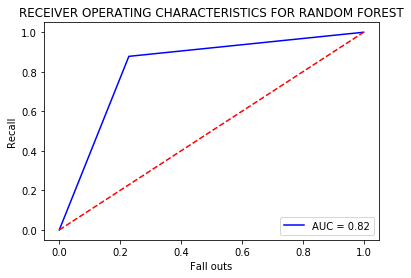

In [46]:
rf_clsf = RandomForestClassifier(n_estimators = 20, max_depth = 5)
rf_clsf.fit(x_train,y_train)
y_pred = rf_clsf.predict(x_test)
print('Accuracy of Random Forest Classifier')
scores = accuracy_score(y_test,y_pred)
print(scores)
print("CONFUSSION MATRIX")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
false_positive_rate, recall , threshold = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,recall)
plt.title("RECEIVER OPERATING CHARACTERISTICS FOR RANDOM FOREST") 
plt.plot(false_positive_rate,recall,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.ylabel('Recall')
plt.xlabel('Fall outs')
plt.show

Accuracy of Logistic Regression
0.8947368421052632
CONFUSSION MATRIX
[[29  6]
 [ 2 39]]
             precision    recall  f1-score   support

          0       0.94      0.83      0.88        35
          1       0.87      0.95      0.91        41

avg / total       0.90      0.89      0.89        76



<function matplotlib.pyplot.show(*args, **kw)>

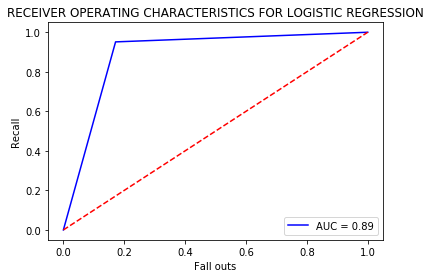

In [47]:
lr_clsf = LogisticRegression(solver='liblinear', random_state=15)
lr_clsf.fit(x_train,y_train)
y_pred = lr_clsf.predict(x_test)
print('Accuracy of Logistic Regression')
scores = accuracy_score(y_test,y_pred)
print(scores)
print("CONFUSSION MATRIX")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
false_positive_rate, recall , threshold = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,recall)
plt.title("RECEIVER OPERATING CHARACTERISTICS FOR LOGISTIC REGRESSION") 
plt.plot(false_positive_rate,recall,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.ylabel('Recall')
plt.xlabel('Fall outs')
plt.show

0.8552631578947368
CONFUSION MATRIX
[[27  8]
 [ 3 38]]
Classification Report
             precision    recall  f1-score   support

          0       0.90      0.77      0.83        35
          1       0.83      0.93      0.87        41

avg / total       0.86      0.86      0.85        76



<function matplotlib.pyplot.show(*args, **kw)>

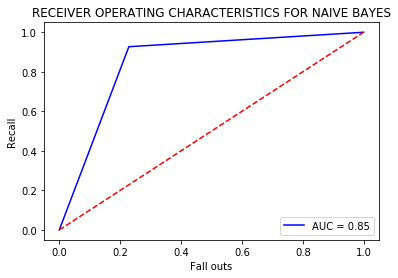

In [48]:
nb_clsf = GaussianNB()
nb_clsf.fit(x_train, y_train)
y_pred = nb_clsf.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
false_positive_rate, recall , threshold = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,recall)
plt.title("RECEIVER OPERATING CHARACTERISTICS FOR NAIVE BAYES")
plt.plot(false_positive_rate,recall,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.ylabel('Recall')
plt.xlabel('Fall outs')
plt.show

0.7105263157894737
CONFUSION MATRIX
[[25 10]
 [12 29]]
Classification Report
             precision    recall  f1-score   support

          0       0.68      0.71      0.69        35
          1       0.74      0.71      0.72        41

avg / total       0.71      0.71      0.71        76



<function matplotlib.pyplot.show(*args, **kw)>

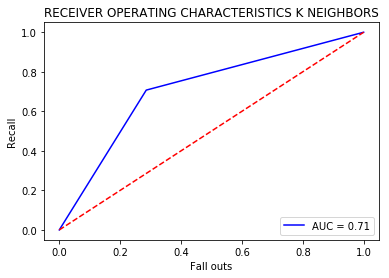

In [49]:
knn_clsf =KNeighborsClassifier(n_neighbors = 6)
knn_clsf.fit(x_train, y_train)
y_pred = knn_clsf.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
false_positive_rate, recall , threshold = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,recall)
plt.title("RECEIVER OPERATING CHARACTERISTICS K NEIGHBORS")
plt.plot(false_positive_rate,recall,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.ylabel('Recall')
plt.xlabel('Fall outs')
plt.show

In [50]:
import joblib
model_name = 'logistic.pkl'
path = 'FYP/'+model_name
joblib.dump(lr_clsf,model_name)


['logistic.pkl']

In [51]:
logistic_load = joblib.load("logistic.pkl")
logistic_load.predict(x_test)


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [52]:
arry = [60,1,0,125,200,0,131,1,2.8,1,1,3]
tes = np.asarray(arry)
se = tes.reshape(1,-1)
logistic_load.predict(se)


array([0], dtype=int64)

In [53]:
arry1 = [66,1,1,160,246,1,120,1,0,1,3,1]
tes = np.asarray(arry1)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([0], dtype=int64)

In [54]:
arry2 = [62,0,0,138,294,1,106,0,1.9,1,3,2
]
tes = np.asarray(arry2)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([0], dtype=int64)

In [55]:
arry3 = [67,0,0,106,293,1,192,0,0.3,2,2,2]
tes = np.asarray(arry3)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([1], dtype=int64)

In [56]:
arry4 = [57,1,0,110,201,0,176,1,1.5,1,0,1]
tes = np.asarray(arry4)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([1], dtype=int64)

In [57]:
arry5 = [34,0,1,118,210,1,192,0,0.7,2,0,2]
tes = np.asarray(arry5)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([1], dtype=int64)

In [59]:
arry6 = [62,1,2,130,231,1,146,0,1.8,1,3,3
]
tes = np.asarray(arry6)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([0], dtype=int64)

In [60]:

arry6 = [51,1,0,140,261,0,186,1,0,2,0,2]
tes = np.asarray(arry6)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([1], dtype=int64)

In [61]:

arry7 = [62,0,0,160,164,0,145,0,6.2,0,3,3]
tes = np.asarray(arry7)
se = tes.reshape(1,-1)
logistic_load.predict(se)
scores = accuracy_score(y_test,y_pred)
print(scores)

0.7105263157894737


In [64]:
arry7 = [44,1,1,120,220,0,170,0,0,2,0,2]
tes = np.asarray(arry7)
se = tes.reshape(1,-1)
logistic_load.predict(se)




array([1], dtype=int64)

In [65]:
arry8 = [52,1,3,118,186,0,0,190,0,0,1,0,1,1]
tes = np.asarray(arry7)
se = tes.reshape(1,-1)
logistic_load.predict(se)

array([1], dtype=int64)